<a href="https://colab.research.google.com/github/AbdullahScripts/AIgineers-GenAI-Hackathon/blob/AI-agent/Hackathon_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests
!pip install ipywidgets requests
!pip install gradio
# Install the required libraries
!pip install newspaper3k
!pip install transformers
!pip install newspaper3k transformers lxml_html_clean

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 48.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done

In [2]:
!pip install newspaper3k requests gradio groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 3.0 MB/s eta 0:00:00


In [3]:
import requests
from newspaper import Article
import json
from groq import Groq


In [4]:
# NewsAPI key
newsapi_key = "b99be3237625496792e1f951bd03b6aa"

# Groq API key (replace with your actual key)
groq_api_key = "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"
client = Groq(api_key=groq_api_key)

In [5]:
# Function to fetch articles
def fetch_news_articles(topic: str, num_articles: int = 3):
    url = f'https://newsapi.org/v2/everything?q={topic}&apiKey={newsapi_key}&pageSize={num_articles}'
    response = requests.get(url)
    response.raise_for_status()
    articles = response.json().get('articles', [])
    return [(article['title'], article['url']) for article in articles]
# Function to scrape article content
def scrape_article(url: str) -> str:
    try:
        article = Article(url)
        article.download()
        article.parse()
        return article.text  # Return full article text
    except Exception as e:
        return f"Failed to scrape article: {e}"

In [6]:
# Function to generate summary using Groq
def generate_summary_with_groq(content: str) -> str:
    # Prepare the request payload
    messages = [{"role": "user", "content": f"Summarize the following article and list the 10 most important points, Highlight the important points in just bullet points. Don't start with anything else; just give me bullet points: {content}"}]

    # Send the request to Groq API (replace `client.chat.completions.create` with your actual API request logic)
    chat_completion = client.chat.completions.create(messages=messages, model="llama3-8b-8192")
    scraped_points = chat_completion.choices[0].message.content
    return scraped_points
    # # Check if the response is successful
    # if chat_completion.status_code == 200:
    #     # Get the summarized content from the response
    #     data = chat_completion.json()
    #     summary = data['choices'][0]['message']['content']
    #     return summary
    # else:
    #     # If the request failed, return an error message
    #     return f"Failed to summarize the article. Status code: {chat_completion.status_code}"

In [7]:
def askoptions():
  # List of options
  options = [
      "Image",
      "Video",
      "Meme"
  ]

  # Function to ask the user to select multiple options
  def get_user_choices():
      print("Please select the options you'd like (separate choices with commas, e.g. 1, 3):")
      for i, option in enumerate(options, start=1):
          print(f"{i}. {option}")

      # Get user input and convert it to a list of selected options
      user_input = input("Enter your choices: ").strip()

      try:
          # Convert input to a list of integers
          selected_choices = [int(choice) for choice in user_input.split(",")]

          # Check if all choices are valid
          if all(1 <= choice <= len(options) for choice in selected_choices):
              selected_options = [options[choice - 1] for choice in selected_choices]
              print("You selected the following options:")
              for option in selected_options:
                  print(option)
              return selected_choices
          else:
              print("Invalid selection. Please enter valid option numbers.")
              return get_user_choices()  # Recursively ask for valid input
      except ValueError:
          print("Invalid input. Please enter numbers separated by commas.")
          return get_user_choices()  # Recursively ask for valid input

  # Record user choices and assign corresponding values
  selected_choices = get_user_choices()

  # Initialize variables for each option
  Image = 1 if 1 in selected_choices else 0
  Video = 1 if 2 in selected_choices else 0
  Meme = 1 if 3 in selected_choices else 0
  return Image,Video,Meme

In [8]:
!pip install together ai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.1 MB/s eta 0:00:00
  Created wheel for ai: filename=ai-1.0.3-py3-none-any.whl size=129822 sha256=74cab1950ef0861604c5b1029fdbc35177521b59fbcbb0e513a078627e1dc1e0
  Stored in directory: /root/.cache/pip/wheels/49/5b/1d/1a5ce00c92c142a79bbc7d4c02baec733bcc76544b1d3dceb4
Successfully built ai
  Attempting uninstall: pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
  Attempting uninstall: typer
    Found existing installation: typer 0.15.0
    Uninstalling typer-0.15.0:
      Successfully uninstalled typer-0.15.0


In [9]:
from together import Together

def gen_textpost(articles_data, platform,topic):
    # Replace 'your_api_key' with your actual API key
    client = Together(api_key='27b92a686e62fa3c74cb22729a1d0bc26e377cb64ac39d3694355f4c5a1b804f')

    formatted_articles = "\n".join(
    f"Title: {article['title']}\nURL: {article['url']}\nSummary: {article['summary']}\n"
    for article in articles_data
)
    command = f'''I need a post for the {platform}. Use the tone and wording that align with the professionalism and context of the platform. I will provide you with a few summaries of articles, and you need to incorporate content from those articles into the post.

    It is very important to mention the name and URL of the references for each part taken from the articles.

    The post must directly start with the content—no need to include introductory phrases like "Here's the post" or anything extra at the end. However, ensure the post includes at least 5 relevant hashtags in line with the platform.

    The post can contain emojis, but avoid using asterisks for bold text. The generated post must be clean and professional.

    The post should primarily focus on the title provided by the user but must incorporate data from the provided articles. It is absolutely necessary to base the post on the data from these articles.

    Here are the articles for the post on the topic of {topic}. Write the post while keeping these articles in mind also add a title for the post as well: {formatted_articles}
    '''
    # Making the API call
    response = client.chat.completions.create(
        model="meta-llama/Llama-3.3-70B-Instruct-Turbo",
        messages=[
            {
                "role": "user",
                "content": f"{command}"
            }
        ],
        max_tokens=700,  # Set appropriate max_tokens
        temperature=0.7,
        top_p=0.7,
        top_k=50,
        repetition_penalty=1,
        stop=["<|eot_id|>", "<|eom_id|>"],
        stream=False  # Set stream to False
    )
    # Check for valid 'choices' and extract content
    if hasattr(response, 'choices') and len(response.choices) > 0:
        content = response.choices[0].message.content

        if content:
            print(content)
            return content
        else:
            print("The generated content is empty.")
    else:
        print("No valid response received or 'choices' not found.")

# Call the function
# gen_textpost()


In [10]:
from together import Together
from PIL import Image
import io
import base64
from IPython.display import display

def gen_Imagepost(post_content,platform, topic):
    # Initialize the Together client
    client = Together(api_key='27b92a686e62fa3c74cb22729a1d0bc26e377cb64ac39d3694355f4c5a1b804f')

    # Define a valid prompt for image generation
    prompt = f"I need a highly realistic, detailed, and professional-quality image for a post on the platform {platform}. The topic of the post is {topic}, and its content focuses on {post_content}. The image should be visually compelling, unique, and perfectly tailored to align with the post's theme, subject matter, and intended tone. It should resonate with the audience of the platform, enhancing the post's message while maintaining an authentic and realistic aesthetic. The image must directly reflect the essence of the topic and content, ensuring relevance and emotional impact."

    try:
        # Generate the image
        response = client.images.generate(
            prompt=prompt,
            model="black-forest-labs/FLUX.1-dev",
            width=1024,
            height=768,
            steps=28,
            n=1,
            response_format="b64_json"
        )

        # Check and decode the generated image data
        if hasattr(response, 'data') and response.data:
            image_base64 = response.data[0].b64_json
            image_data = base64.b64decode(image_base64)  # Decode the Base64 data
            image = Image.open(io.BytesIO(image_data))  # Create an image object
            display(image)  # Display the image
        else:
            print("No image data received from the API.")

    except Exception as e:
        print(f"An error occurred: {e}")


Enter the topic you want to search for: hockey
Enter the Platform you want to make post for: linkedin
Please select the options you'd like (separate choices with commas, e.g. 1, 3):
1. Image
2. Video
3. Meme
Enter your choices: 1
You selected the following options:
Image
Fetching articles about 'hockey'...

Processing Article 1...
Generating summary using Groq...

--------------------------------------------------------------------------------

Processing Article 2...
Generating summary using Groq...

--------------------------------------------------------------------------------

Processing Article 3...
Generating summary using Groq...

--------------------------------------------------------------------------------

Twins play for Wales again almost 50 years later 🏑️
As reported by BBC News (https://www.bbc.com/news/articles/ckg0e5dkmnro), twin sisters Jean Satterley and Jan Cornell have made history by playing for Wales' Masters team in the over-65s category at the Masters Hockey W

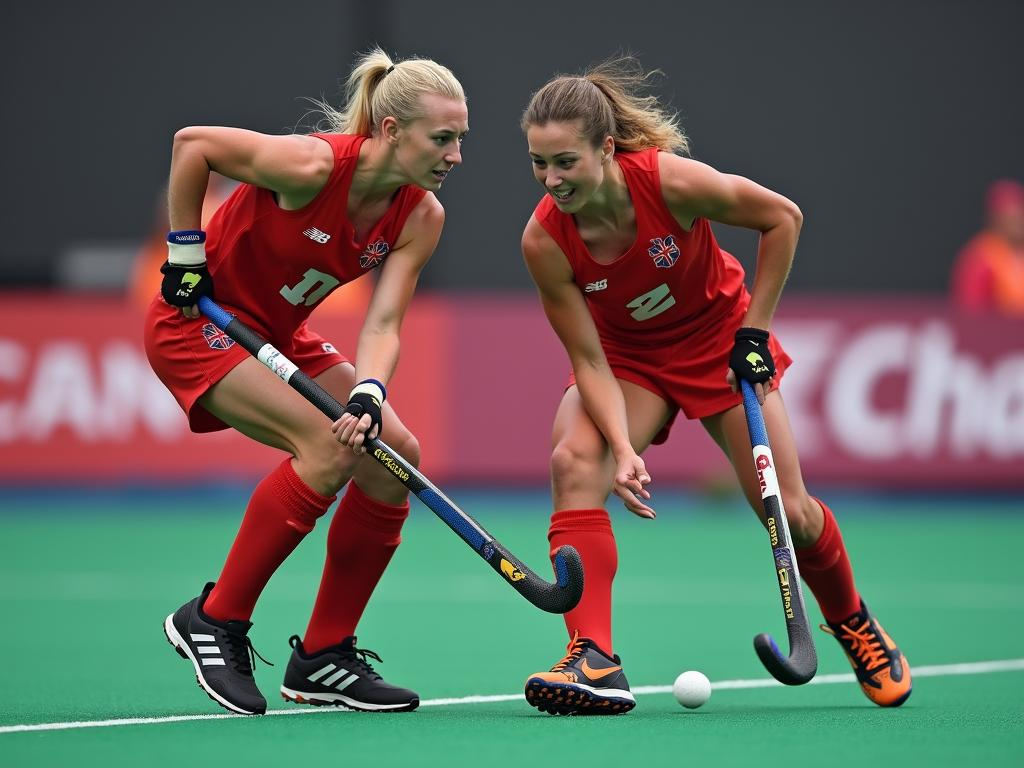

In [12]:
# Main function to fetch, scrape, summarize, and display articles
def main():
    # Take topic input from the user
    topic = input("Enter the topic you want to search for: ")
    Platform = input("Enter the Platform you want to make post for: ")
    Image,Video,Meme = askoptions()
    # Fetch articles
    print(f"Fetching articles about '{topic}'...\n")
    articles = fetch_news_articles(topic)

    if not articles:
        print("No articles found for the given topic.")
        return

    # List to store article information
    articles_data = []

    # Scrape, summarize, and store each article's information
    for i, (title, url) in enumerate(articles, start=1):
        print(f"Processing Article {i}...")
        # print(f"Title: {title}")
        # print(f"URL: {url}\n")

        # Scrape the article content
        article_text = scrape_article(url)
        if article_text:
            # print(f"Content scraped from article (preview): {article_text[:300]}...")  # Preview first 300 characters

            # Summarize the content using Groq
            print("Generating summary using Groq...")
            summary = generate_summary_with_groq(article_text)
            # print(f"Summary generated: {summary}")
        else:
            print(f"Failed to scrape content from {url}.")
            summary = "Failed to generate summary due to missing content."

        # Add article details to the list
        articles_data.append({
            "title": title,
            "url": url,
            "summary": summary
        })

        print("\n" + "-" * 80 + "\n")
    post_content = gen_textpost(articles_data, Platform, topic)
    if Image == 1:
      gen_Imagepost(post_content,Platform, topic)
    # # Print all stored data
    print("All Articles' Data:")
    for article in articles_data:
        print(f"Title: {article['title']}")
        print(f"URL: {article['url']}")
        print(f"Summary: {article['summary']}")
        print("\n" + "-" * 80 + "\n")
# Run the main function
if __name__ == "__main__":
    main()
